In [36]:
%matplotlib inline

In [37]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph

In [38]:
path = Path(".")
if not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

if not path.joinpath("cf-scripts").is_dir():
    !git clone https://github.com/regro/cf-scripts
    !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

Cloning into 'cf-graph-countyfair'...
remote: Enumerating objects: 64693, done.
remote: Counting objects: 100% (64693/64693), done.
remote: Compressing objects: 100% (36858/36858), done.
remote: Total 64693 (delta 57735), reused 30199 (delta 27831), pack-reused 0
Receiving objects: 100% (64693/64693), 85.20 MiB | 7.25 MiB/s, done.
Resolving deltas: 100% (57735/57735), done.
Updating files: 100% (65637/65637), done.
ln: failed to create symbolic link 'graph.json': File exists
Cloning into 'cf-scripts'...
remote: Enumerating objects: 8563, done.
remote: Total 8563 (delta 0), reused 0 (delta 0), pack-reused 8563
Receiving objects: 100% (8563/8563), 2.08 MiB | 8.80 MiB/s, done.
Resolving deltas: 100% (6094/6094), done.


In [39]:
cd cf-graph-countyfair

/home/christopher/dev/conda-forge/cf-graph-countyfair/cf-graph-countyfair


In [40]:
gx = load_graph()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
a = 'created_at'
b = 'closed_at'

In [43]:
import datetime
import time

In [44]:
def get_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%SZ')

In [45]:
elapsed = []
started = []

In [46]:
for k, node in gx.nodes.items():
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"]:
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

In [47]:
df = pd.DataFrame({'elapsed': elapsed, 'started': started})
df = df.set_index('started')

In [48]:
datetime.datetime.today() + pd.offsets.MonthEnd() + pd.offsets.MonthEnd()

Timestamp('2020-06-30 18:13:33.701617')

In [59]:
date_ranges = [str(x) for x in pd.date_range(np.min(started), 
                                             datetime.datetime.today() + pd.offsets.MonthEnd() + pd.offsets.MonthEnd(), 
                                             freq='M', closed='left')]

In [60]:
date_ranges

['2018-06-30 22:41:25',
 '2018-07-31 22:41:25',
 '2018-08-31 22:41:25',
 '2018-09-30 22:41:25',
 '2018-10-31 22:41:25',
 '2018-11-30 22:41:25',
 '2018-12-31 22:41:25',
 '2019-01-31 22:41:25',
 '2019-02-28 22:41:25',
 '2019-03-31 22:41:25',
 '2019-04-30 22:41:25',
 '2019-05-31 22:41:25',
 '2019-06-30 22:41:25',
 '2019-07-31 22:41:25',
 '2019-08-31 22:41:25',
 '2019-09-30 22:41:25',
 '2019-10-31 22:41:25',
 '2019-11-30 22:41:25',
 '2019-12-31 22:41:25',
 '2020-01-31 22:41:25',
 '2020-02-29 22:41:25',
 '2020-03-31 22:41:25',
 '2020-04-30 22:41:25',
 '2020-05-31 22:41:25']

In [51]:
medians = []
less_1_month = []
open_pr = []

In [52]:
hour = 1
day = 24

In [62]:
cd ../by-the-numbers

/home/christopher/dev/conda-forge/by-the-numbers


In [63]:
for i, (be, en) in enumerate(zip(date_ranges, date_ranges[1:])):
    
    nelapsed = df[be:en]['elapsed']/(60*60)
    
    medians.append(np.median(nelapsed))
    less_1_month.append(np.sum(nelapsed < 30*day) / len(nelapsed))
    open_pr.append(np.sum(np.isnan(np.asarray(nelapsed))))
    
    vals, _= np.histogram(nelapsed, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day, pd.NaT])
    for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
        with plt.style.context(*context):
            plt.axes(label=i)
            plt.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+', 'not closed'], )
            plt.xticks(rotation=45)
            plt.title(f'{be.split(" ")[0]}-{en.split(" ")[0]}')
            plt.savefig(f"plots/{be.split(" ")[0]}-{en.split(" ")[0]}-{'_'.join(context)}.png")
    

SyntaxError: f-string: mismatched '(', '{', or '[' (<ipython-input-63-b68d221d33ab>, line 16)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

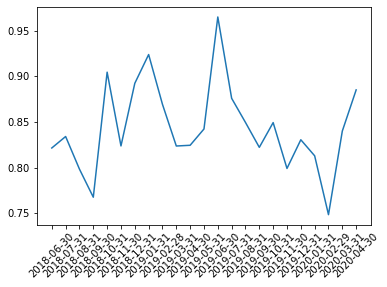

In [54]:
plt.plot([x.split(' ')[0] for x in date_ranges[:-1]], less_1_month)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

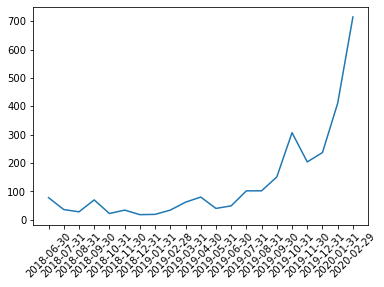

In [119]:
plt.plot([x.split(' ')[0] for x in date_ranges[:-1]], open_pr)
plt.xticks(rotation=45)

In [105]:
np.sum(np.isnan(np.asarray(elapsed)))

3246

In [162]:
vals, _= np.histogram(np.asarray(elapsed)/60/60, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

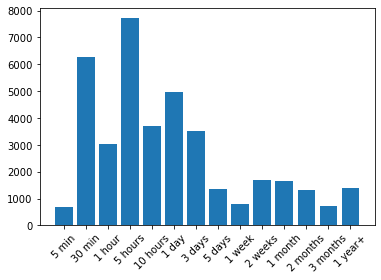

In [163]:
plt.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+'], )
plt.xticks(rotation=45)